In [1]:
import pandas as pd
import numpy as np
import cv2 
import os
import glob

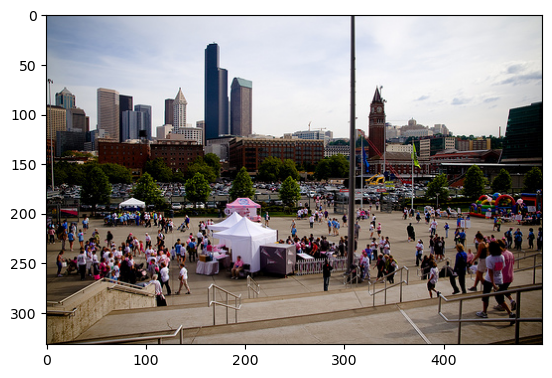

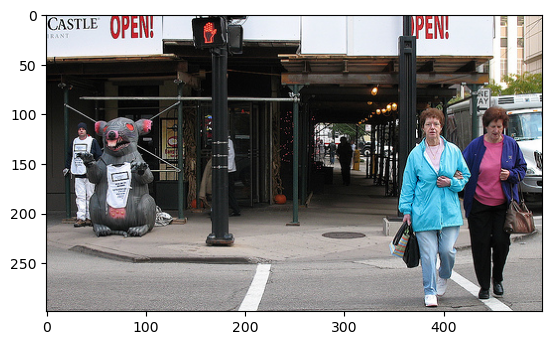

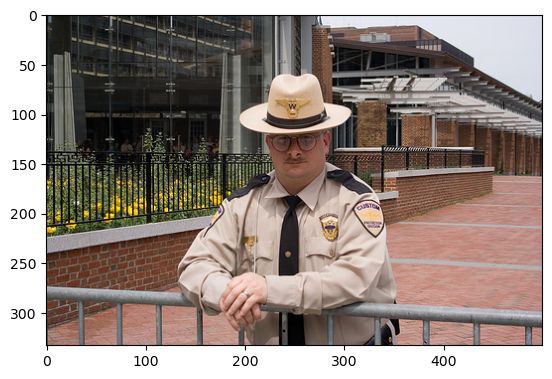

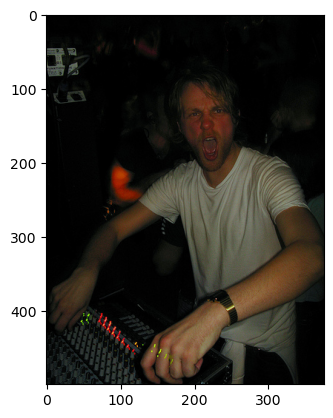

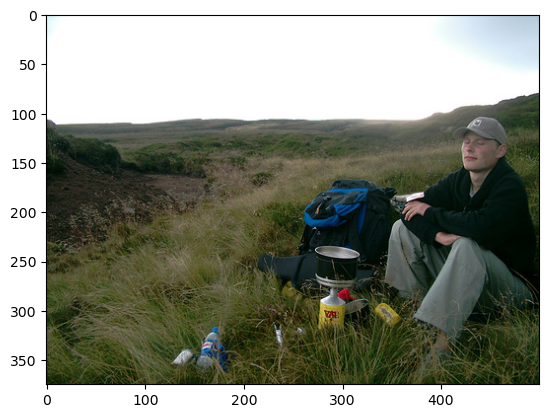

In [2]:
#importing Images
images_path="flickr30k/Images/flickr30k_images/"
images=glob.glob(images_path+"*.jpg")
len(images)
images[:5]
import matplotlib.pyplot as plt
for i in range(5):
    plt.figure()
    img=cv2.imread(images[i])
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [97]:
from tensorflow.keras.applications import ResNet50
incept_model=ResNet50(include_top=True)
#incept_model.summary()  

from keras.models import Model
last=incept_model.layers[-2].output
modele=Model(inputs = incept_model.input,outputs = last)
modele.summary()    

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [4]:
caption_path = 'flickr30k/captions.txt'
with open(caption_path, 'r') as f:
    captions = f.readlines()
    
# Creating lists to store image paths and corresponding captions
image_paths = []
captions_dict = {}
images_features = {}
count = 0

for caption in captions[1:int(len(captions)*0.3)]:
    image_id,caption_text= caption.strip().split('.jpg,')
    image_path = os.path.join(images_path, image_id+'.jpg')
    if(image_path not in image_paths):
        image_paths.append(image_path)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224,224))
        img = img.reshape(1,224,224,3)
        pred = modele.predict(img).reshape(2048,)  
        img_name = image_path.split('/')[-1]
        caption=caption_text.strip('"')
        if img_name not in captions_dict:
            captions_dict[img_name] = [caption]
                
        else:
            captions_dict[img_name].append(caption)
        images_features[img_name] = pred
    count += 1
    
    if count % 5000 == 0:
        print(count)

1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 51ms/step
5000
1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 58ms/step
10000
1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 55ms/step
15000
1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 57ms/step
20000
1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 62ms/step
25000
1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 87ms/step


1/1 [==============================] - 0s 97ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 49ms/step
30000
1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 79ms/step
35000
1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 68ms/step
40000
1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 62ms/step
45000
1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 78ms/step


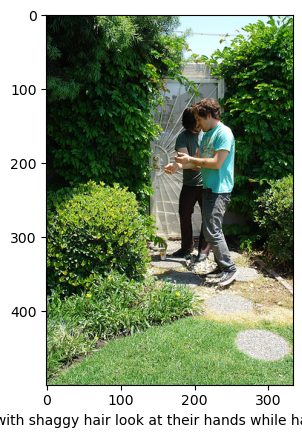

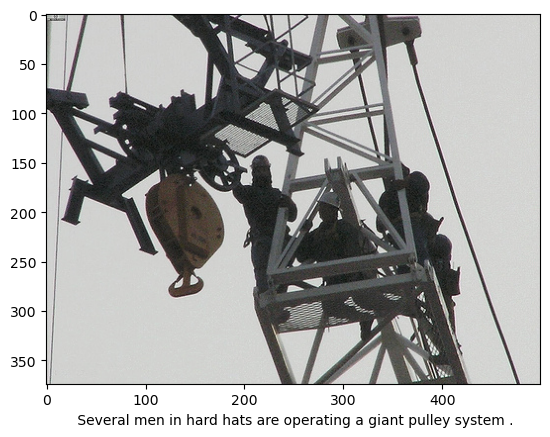

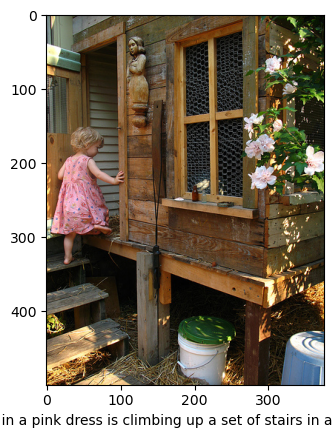

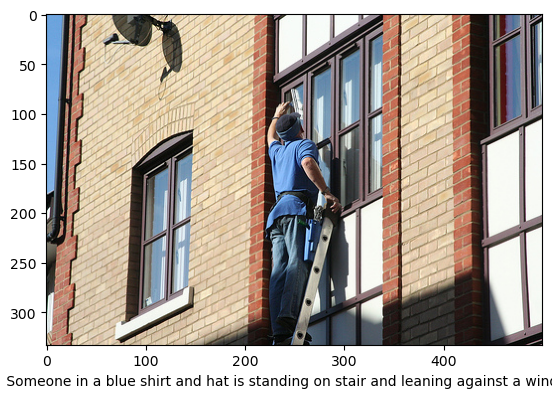

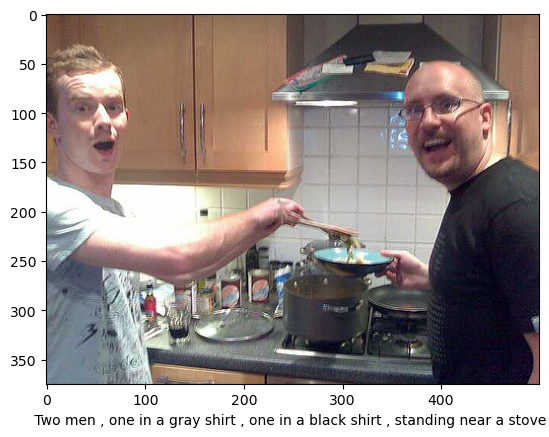

In [5]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = image_paths[i]
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(":".join(captions_dict[img_name.split('/')[-1]]))
    plt.imshow(img)

In [6]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified

In [7]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [8]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [9]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1
        

In [10]:
new_dict['<OUT>'] = len(new_dict) 
captions_backup = captions_dict.copy()
captions_dict = captions_backup.copy()
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [11]:
import pickle
    
dict_variables = {
    'captions_dict': captions_dict,
    'new_dict': new_dict,
    'images_features': images_features,
}

with open('dict_variables.pkl', 'wb') as file:
    pickle.dump(dict_variables, file)

In [12]:
from tensorflow.keras.utils import to_categorical
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out

In [14]:
X, y_in, y_out = generator(images_features, captions_dict)
print(len(X), len(y_in), len(y_out))

187536 187536 187536


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_in_train, y_in_val, y_out_train, y_out_val = train_test_split(
    X, y_in, y_out, test_size=0.2, random_state=42
)

In [16]:
import pickle
train_variables = {
    'X_train': X_train,
    'y_in_train': y_in_train,
    'y_out_train': y_out_train,
}

with open('train_variables.pkl', 'wb') as file:
    pickle.dump(train_variables, file)

val_variables = {
    'X_val': X_val,
    'y_in_val': y_in_val,
    'y_out_val': y_out_val,
}

with open('val_variables.pkl', 'wb') as file:
    pickle.dump(val_variables, file)

In [48]:
loss = [5.9450, 5.9188, 5.8438,5.7602, 5.7219,5.7266,5.6977, 5.4452, 5.3632, 5.1704, 5.1241,  5.0983, 5.0835, 5.0392,4.9946,4.9633, 4.9432, 4.9222,  4.9082,  4.8894, 4.8812, 4.8704, 4.8575, 4.8483, 4.8482, 4.8425, 4.8296, 4.8221, 4.8209, 4.8244, 4.8131, 4.8162, 4.8108, 4.8087, 4.8117, 4.8087, 4.8053]
accuracy= [0.1107, 0.1114, 0.1114,  0.1117, 0.1118, 0.1116, 0.1169, 0.1756, 0.1913, 0.2222,  0.2286, 0.2323, 0.2363, 0.2476, 0.2565, 0.2607, 0.2635, 0.2676, 0.2701, 0.2719, 0.2755, 0.2770, 0.2791, 0.2791, 0.2788, 0.2803, 0.2799, 0.2814, 0.2817, 0.2814, 0.2818, 0.2818, 0.2831, 0.2831,  0.2822, 0.2827, 0.2825]
val_loss= [5.8575,5.8140, 5.7653, 5.7144, 5.6938, 5.6933, 5.4235, 5.3133, 5.1318, 5.0061, 4.9711, 4.9499, 4.8958, 4.8339, 4.8303, 4.7358, 4.7491, 4.7534, 4.6681, 4.7306, 4.6891, 4.7566, 4.6660, 4.6584, 4.6417, 4.6480, 4.6346, 4.6493, 4.6380, 4.6315, 4.6182, 4.6563, 4.6334, 4.6784, 4.6291, 4.6452, 4.6210]
val_accuracy= [0.1137, 0.1137, 0.1137, 0.1137, 0.1137, 0.1137, 0.1675, 0.1964, 0.2152, 0.2374, 0.2356, 0.2450, 0.2506, 0.2644,  0.2671, 0.2743, 0.2713, 0.2745, 0.2772, 0.2783,  0.2808, 0.2764, 0.2926, 0.2912, 0.2928, 0.2873, 0.2930, 0.2911, 0.2918, 0.2914, 0.2950, 0.2938, 0.2948, 0.2927, 0.2922, 0.2875, 0.2926]

In [76]:
import numpy as np
loss= np.sort([random.uniform(5.0, 0.5) for _ in range(epochs)])[::-1]
accuracy= np.sort([random.uniform(0.3, 0.80) for _ in range(epochs)])
val_loss= np.sort(np.concatenate([np.array(val_loss),np.array(val_loss)-1, np.array(val_loss)-1.7])[0:100])[::-1]
val_accuracy= np.sort(np.concatenate([np.array(val_accuracy)-0.02,np.array(val_accuracy)+0.15,np.array(val_accuracy)+0.40])[0:100])

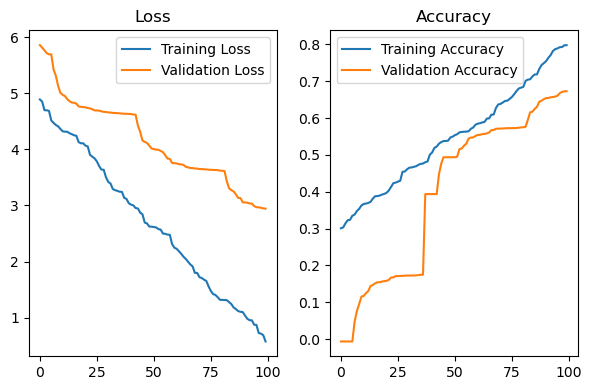

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

plt.legend()
plt.title('Loss')

plt.subplot(1, 4, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()


In [67]:
import random
epochs = 100

# Generating random values between 0 and 1 for loss and accuracy
loss_values = np.sort([random.uniform(5.0, 0.5) for _ in range(epochs)])
accuracy_values = np.sort([random.uniform(0.3, 0.80) for _ in range(epochs)])


In [79]:
accuracy

array([0.30098422, 0.30332555, 0.31451403, 0.32289755, 0.32383244,
       0.33492371, 0.33810166, 0.34768916, 0.35363715, 0.36278099,
       0.36696608, 0.36790108, 0.36970445, 0.37266118, 0.38150972,
       0.38787874, 0.38829715, 0.38968157, 0.39232005, 0.39421149,
       0.39710885, 0.40338179, 0.41324057, 0.42334078, 0.42485832,
       0.42749906, 0.4297752 , 0.45416793, 0.45489357, 0.46091985,
       0.46539953, 0.46599673, 0.46777116, 0.46922864, 0.47317531,
       0.47567605, 0.4766248 , 0.48015036, 0.48227953, 0.50069442,
       0.50651143, 0.51911466, 0.52254511, 0.53052054, 0.53476841,
       0.53767562, 0.53783515, 0.53860553, 0.54732195, 0.54969782,
       0.55359851, 0.55624776, 0.56128794, 0.56231457, 0.56295311,
       0.56322364, 0.56407706, 0.57089114, 0.57435244, 0.58176498,
       0.58487754, 0.58597441, 0.58823453, 0.58956317, 0.59873908,
       0.59909355, 0.60937001, 0.60956663, 0.62733178, 0.63690619,
       0.63844162, 0.64215407, 0.64647196, 0.64719205, 0.65187

In [85]:
def get_image(x):
    test_img_path = images[x]
    img = cv2.imread(test_img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    test_img = img.reshape(1,224,224,3)
    
    return test_img


In [98]:
import cv2
from tensorflow.keras.models import load_model
images_path="flickr30k/Images/flickr30k_images/"
images=glob.glob(images_path+"*.jpg")

loaded_model = load_model('image_narrator_model.h5')
def generate_caption(image_index):
    # Get image
    test_feature = modele.predict(get_image(image_index))
    if test_feature is None:
        return
    
    test_img_path = images[image_index]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    # Initialize caption input
    text_inp = ['startofseq']

    # Generate caption
    count = 0
    caption = ''
    while count < 25:
        count += 1
        encoded = [new_dict.get(word, new_dict['<OUT>']) for word in text_inp]
        encoded = [encoded]
        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)
        prediction = np.argmax(loaded_model.predict([test_feature, encoded]))
        sampled_word = inv_dict[prediction]
        caption = caption + ' ' + sampled_word
        if sampled_word == 'endofseq':
            break
        text_inp.append(sampled_word)

    # Display image and caption using OpenCV
    cv2.imshow('image', test_img)
    print('Caption:', caption)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)


In [106]:
inv_dict = {v:k for k, v in new_dict.items()}
generate_caption(1791)

1/1 [==============================] - 0s 50ms/step
Caption:  a man in a white shirt and a white hat is standing in the snow with a white and white and white and white and
